<a href="https://colab.research.google.com/github/jaehyun99/Computer_Vision/blob/main/Lab05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import cv2
from google.colab.patches import cv2_imshow

import numpy as np
import matplotlib.pyplot as plt
import math

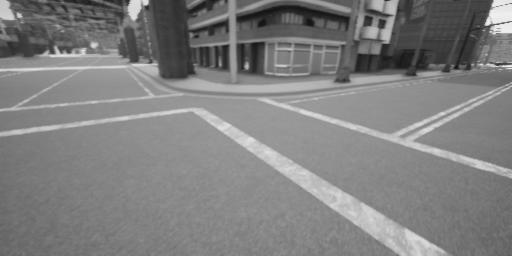

In [ ]:
img = cv2.imread('drive/MyDrive/PR201910807/images/lab05/lane01.jpg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

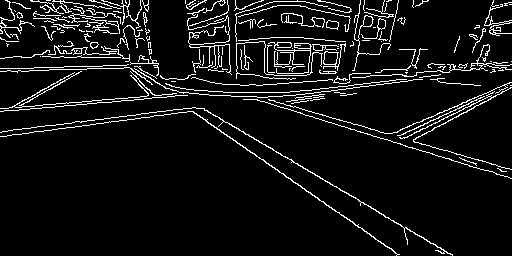

In [ ]:
canny = cv2.Canny(gray_img, 70 , 150)
cv2_imshow(canny)

In [ ]:
def ROI_selection(img, vertices):
  mask = np.zeros_like(img)
  cv2.fillPoly(mask, vertices, (255))
  return cv2.bitwise_and(img, mask)

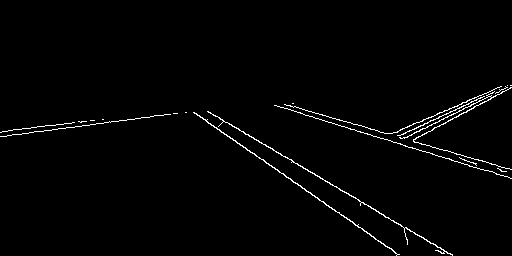

In [ ]:
height, width = img.shape[:2]
vertices = np.array([[(0, height//2),
                      (0, height),
                      (width, height),
                      (width, height//3)]])

maskimg = ROI_selection(canny, vertices)

cv2_imshow(maskimg)

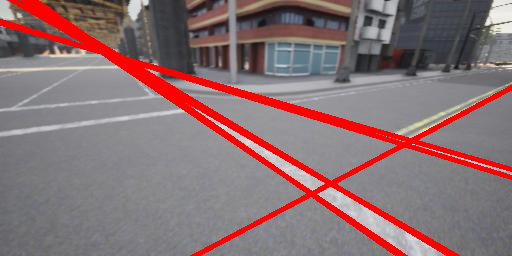

In [ ]:
lines = cv2.HoughLines(maskimg, rho = 1, theta = np.pi/180, threshold = 100,)
result = np.copy(img)

if lines is not None:
  for i in range(0, len(lines)):
    rho = lines[i][0][0]
    theta = lines[i][0][1]
    a = math.cos(theta)
    b = math.sin(theta)
    x0 = a * rho
    y0 = b * rho
    pt1 = (int(x0 + 1000*(-b)), int(y0 + 1000*(a)))
    pt2 = (int(x0 - 1000*(-b)), int(y0 - 1000*(a)))
    cv2.line(result, pt1, pt2, (0,0,255), 3)

cv2_imshow(result)

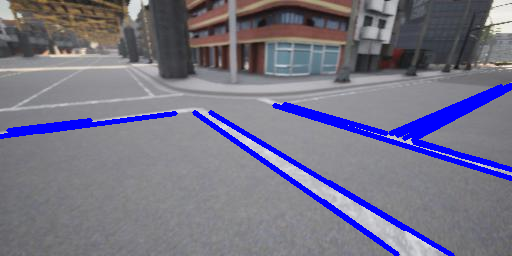

In [ ]:
linesp = cv2.HoughLinesP(maskimg, rho =1, theta = np.pi/180, threshold = 30, minLineLength=10, maxLineGap=10)
result = np.copy(img)

for line in linesp:
    x1, y1, x2, y2 = line[0]
    cv2.line(result, (x1, y1), (x2, y2), (255, 0, 0), 3)

cv2_imshow(result)

#이캠퍼스 세선화

In [ ]:
import cv2

from google.colab.patches import cv2_imshow

from skimage.morphology import skeletonize

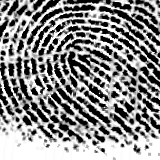

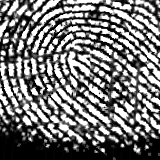

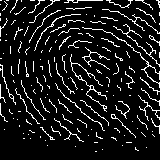

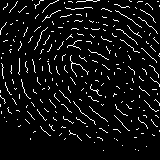

In [ ]:
img = cv2.imread("drive/MyDrive/PR201910807/images/lab04/fingerprint01.bmp")

gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)



# 지문에 해당하는 부분이 255, 배경이 0이 되도록 이미지 화소값 반전

inverted_gray = 255 - gray



# 옵션1) OpenCV 패키지를 이용한 세선화 알고리즘

thinned_opencv = cv2.ximgproc.thinning(inverted_gray)  # thinningType 기본값: cv2.ximgproc.THINNING_ZHANGSUEN

"""

다음과 같이 thinning 알고리즘을 명시해 줄 수 있음 (기본값: cv2.ximgproc.THINNING_ZHANGSUEN)



opencv_ZHANGSUEN = cv2.ximgproc.thinning(inverted_gray, thinningType=cv2.ximgproc.THINNING_ZHANGSUEN)

opencv_GUOHALL = cv2.ximgproc.thinning(inverted_gray, thinningType=cv2.ximgproc.THINNING_GUOHALL)

"""



# 옵션2) scikit-image 패키지를 이용한 세선화 알고리즘

thinned_skimage = skeletonize(inverted_gray/255.0)

"""

주의) skeletonize()의 결과는 0.0~1.0 사이의 값으로 리턴되므로, 추후 이미지 처리 시 유의해야 함

다음과 같이 skeletonize 알고리즘을 명시해 줄 수 있음 (기본값: 'zhang')



thinned_skimage = skeletonize(inverted_gray/255.0, method='zhang')

thinned_skimage = skeletonize(inverted_gray/255.0, method='lee')

"""



# 결과 시각화

cv2_imshow(gray)

cv2_imshow(inverted_gray)

cv2_imshow(thinned_opencv)

cv2_imshow((thinned_skimage*255).astype('uint8'))

